## Machine Learning and prediction
Elements of Data Science   
In this laboratory we will use training data to predict outcomes. We will first test these ideas using data on alcohol boiling points which we explored briefly in Lab 9. In our culminating activity we will predict molecular acidity using data computed by [Prof. Vince Voelz](http://www.voelzlab.org) in the Temple Chemistry department and a graduate student, Robert Raddi. See their paper: [Stacking Gaussian processes to improve pKa predictions in the SAMPL7 challenge](https://link.springer.com/epdf/10.1007/s10822-021-00411-8?sharing_token=yLV8dMXdxg40M_Ds_2Rhsfe4RwlQNchNByi7wbcMAY6fCl3bMLQiAhJzS2zZw-SwUkz490heLLZu1bPJ8T5LHXo1WvZkp0AJmWzXo71rszl8UaPxjqtqR-oARfxWGrTiCV0rNXy0C7IVzX6yoMYTPv2ZJfnQS-zF1pYvL8ESsUI%3D).

<br>**<center>Learning Goals**
|Area|Concept|
|---|---|
|Machine Learning|Need to use training data for 'learning' to predict target value or category. Multiple algorithms|
|Nearest Neighbor |Machine learning algorithm in which data that is 'nearest' or most similar will likely have similar target value|
|target| value or category to be predicted|
|features| data used to train model to predict|
|Euclidean distance|a measure of distance in a multidensional space|



In [ ]:
Your_name = ...

**Initialization and module import**

In [3]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.colors import ListedColormap

from gofer.ok import check
Temple_color = '#9E1B34'

from jupyterquiz import display_quiz
import json
from IPython.core.display import HTML
from ipywidgets import interact, interactive, fixed,IntSlider
import ipywidgets as widgets
from EDS_mod.EDS_mod import *
import os
user = os.getenv('JUPYTERHUB_USER')
notebooks = glob.glob('*.ipynb')
notebook = max(notebooks, key=os.path.getmtime)

---
---

<div class="alert alert-info">
  <strong>Nearest neighbor</strong>
</div>

## Learning from training data
A key concept in machine learning is using a subset of a dataset to train an algorithm to make estimates on a separate set of test data. The quality of the machine learning and algorithm can be assesed based on the accuracy of the predictions made on test data. Many times there are also parameters sometimes termed hyper-parameters which can be optimized through an iterative approach on test or validation data. In practice a dataset is randomly split into training and test sets using sampling. 

### k nearest neighbor
We will examine one machine learning algorithm in the laboratory, k nearest neighbor. Many of the concepts are applicable to the broad range of machine learning algorithms available.

### Nearest neighbor concept<a id='NNconcept'></a>
The training examines the characteristics of *k* nearest neighbors to the data point for which a prediction will be made. Nearness is measured using several different [metrics](https://www.nhm.uio.no/english/research/infrastructure/past/help/similarity.html) with Euclidean distance being a common one for numerical attributes.  
Euclidean distance:   
1-D: $$ d(p,q) = \sqrt{(p-q)^{2}} $$   
 2-D: $$ d(p,q) = \sqrt{(p_1-q_1)^{2}+(p_2-q_2)^{2}} $$
 
For multiple points (rows, multidimensional): $$ d(p_i,q_i) = \sqrt{\sum_{i}{((p_i-q_i)^{2})}} $$

#### An example in 2-D Cartesian coordinates

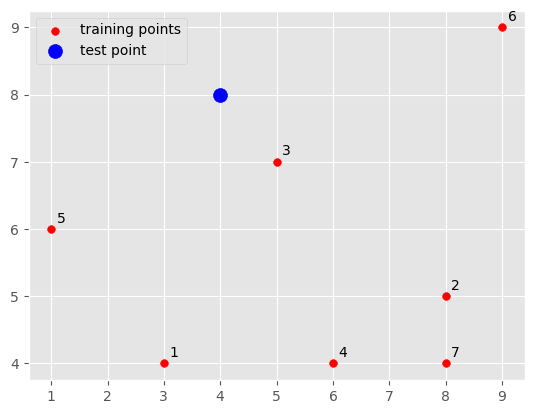

In [4]:
x = np.array([3, 8, 5, 6, 1, 9, 8])
y = np.array([4, 5, 7, 4, 6, 9, 4])
testx = np.array([4])
testy = np.array([8])
n = list(np.arange(1,8))
color = "red"
plt.scatter(x, y, c = color, s=30,label = 'training points')
plt.scatter(testx, testy, c = 'blue', s=100, label = 'test point')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i]+.1, y[i]+.1))
plt.legend()
plt.show()

### Compute Euclidean distances
$ d(x,y) = \sqrt{(x_{test}-x_{train})^{2}+(y_{test}-y_{train})^{2}} $

**Execute the following code to compute distance and use a Table examine distance from <font color=blue>blue</font> test point to each <font color=red>red</font> neighbor.**

In [5]:
distance = np.sqrt((testx - x)**2 + (testy - y)**2)  # Compute numpy array of distances from training point

In [6]:
distance_Table = Table().with_columns('Training point', n, 'Distance', distance)
distance_Table

Training point,Distance
1,4.12311
2,5
3,1.41421
4,4.47214
5,3.60555
6,5.09902
7,5.65685


Now sort to see the nearest in order...

In [ ]:
distance_Table.sort('Distance')

**<font color='#9E1B34' size=4>Training point 3 is the nearest neighbor!**

##### Try different attribute values in the following 2D Euclidean distance example code below to get a feel for the computation

In [ ]:
# Example code to compute an Euclidean distance between two 2-D points
d_p_q = np.sqrt(sum((make_array(2,3)-make_array(4,3))**2))
d_p_q

#### A couple quick review questions about nearest neighbor below, select the best answer (multiple tries ok). Execute the below cell to reveal the self-check quiz.

In [ ]:
with open("questions.json", "r") as file:
    questions=json.load(file)    
display_quiz(questions)

### k nearest  neighbor regression
We will use the k nearest neighbor algorithm to make predictions of the boiling point (K) of alcohols with differing molecular weight, number of carbon atoms, and differing degree, primary (1), secondary (2), tertiary (3). Below are the 3D structures of three 4-carbon butanol derived primary, secondary, and tertiary alcohols. 

<font color='#9E1B34' size="3"><a id='degree_trend'></a>Can you see a trend in boiling point for the below alcohols with the same molecular weight and number of carbons?

In [ ]:
smiles3D("CCCCO") #n-butanol; Molecular Weight = 74.12 g/mol 117.7°C = 391 K; degree = 1

In [ ]:
smiles3D("CCC(C)O") #2-butanol; Molecular Weight = 74.12 g/mol; bp = 98 °C = 371 K; degree = 2

In [ ]:
smiles3D("CC(C)(C)O") #2-methylpropan-2-ol; Molecular Weight = 74.12 g/mol; bp = 82 °C = 355 K; degree = 3

**<font color=green>Question: What is the trend in boiling point for these alcohols with the same molecular weight (MW)?</font>**

#### Save notebook before check

In [ ]:
check('tests/q1d.py')

### Load and examine alcohol molecular data for boiling point prediction

In [ ]:
data_file = 'data/ROH_data.csv'
ROH_data = Table().read_table(data_file)
ROH_data

**<font color='#9E1B34' size="3">Use scatter plot to examine relationship between molecular weight (MW) and boiling point (bp).**

In [ ]:
plt.scatter(ROH_data['MW'],ROH_data['bp'],color = Temple_color, s=10*ROH_data['carbons'])
plt.xlabel('MW [g/mol]')
plt.ylabel('bp [K]')
plt.show()

**<font color=green>Question: What is the trend in boiling point for these alcohols as molecular weight (MW) changes?</font>**

#### Save notebook before check

In [ ]:
check('tests/q1e.py')

#### <font color=blue> **Question 1.** </font>
For machine learning we need to split our data into training data and test data to build our model. Use the datascience .split(n) Table method to split the dataset into 80% training and 20% test. The argument for .split(n) method,n, needs to be an integer, use `int()` as part of the split. [See datascience documentation](https://datascience.readthedocs.io/en/master/_autosummary/datascience.tables.Table.split.html#datascience.tables.Table.split)

In [ ]:
trainf, testf = ROH_data.split(...)
print(trainf.num_rows, 'training and', testf.num_rows, 'test instances.')

In [ ]:
check('tests/q1.py')

### Nearest Neighbors Distance Computation

The cell below shows how to get values from a row in a Table as an array as is done in row_distance. Note in the alcohol data case we will start with the molecular weight (MW) feature column in nearest neighbor computation but in examples below we will use a 2-D array of features as we include the degree as a second feature in predicting alcohol boiling points and a 5-D array with 5 features in the chemistry and molecular acidity prediction below.

#### <font color=blue> **Question 2.** </font>
Define a function which is the Euclidean distance between two values. Use the example code cells under <a href='#NNconcept'>Nearest Neighbor Concept above</a> as inspiration. This is where we will compute the distance between two feature values.

In [4]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return  np.sqrt(((pt1 - pt2)**2))

Test your function by trying a few points in 2-D space (x,y) like the example below

In [5]:
distance(np.array([3,4]),np.array([2,4]))

array([ 1.,  0.])

In [6]:
distance(np.array([...,...]),np.array([...,...]))

TypeError: unsupported operand type(s) for -: 'ellipsis' and 'ellipsis'

In [7]:
check('tests/q2.py')

#### Rest of the nearest neighbor algorithm
Execute these cells to create the complete algorithm and later use as part of a nearest neighbor toolbox for project

In [ ]:
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2)) # Need to convert rows into arrays

def distances(training, test, target, features):
    """Compute the distance from test for each row in training."""
    dists = []
    attributes = training.select(features)
    for row in attributes.rows:
        dists.append(row_distance(row, test))
    return training.with_column('Distance', dists)

def closest(training, test, k, target, features):
    """Return a table of the k closest neighbors to example row from test data."""
    return distances(training, test, target, features).sort('Distance').take(np.arange(k))

### Regression Functions
Use as part of a toolbox for later analysis and the project

In [ ]:
def standard_units(any_array):
    "Convert any array of numbers to standard units."
    return (any_array - np.mean(any_array))/np.std(any_array)  
    
def correlation(t, label_x, label_y):
    """Compute the correlation between two variables from a Table with column label_x and label_y.."""
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    """Compute the slope between two variables from a Table with column label_x and label_y."""
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    """Compute the slope between two variables from a Table with column label_x and label_y."""
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

#### <font color=blue> **Question 3.** </font>
We will look at the Table containing the test data set and then we can take a specific row using `.take(5)` which would take the 6th row of the test data (zero referenced). This specific row will be used to test the prediction of a boiling point given the value of the feature Molecular Weight (MW) in the test row.

In [ ]:
testf

In [ ]:
testf.take(5)

### Machine Learning <b>features</b> and <b>target</b>
In machine learning models there is a value or category we seek to predict and this is known as the target. The attributes and data that are used to train the machine learning model are called the features. We will place the features and target in lists with the string label of each feature and target from the Table that contains the data used for training and testing. Here we will start with a `target` of "bp" using a single feature of "MW" as we did in the regression in in the beginning of Lab 09.

In [ ]:
features = ["MW"]
target = ["bp"]

To get both features and the target we can use the nice property of list addition which combines the list. This then works well with the Table `.select()` method which can take a list of column labels.

In [ ]:
target+features

Now we can look at fetures and target in the first row of the testf Table

In [ ]:
testf.select(target+features)

Example below will create a test row without the `MW` data. The value of `bp` will be predicted by the nearest neighbor machine learning algorithm.

In [ ]:
testf.select(target+features).row(5) 

Create a test row based on row 6 from the test data (testf), `.select()` only the features (no target) and use the closest function to see the top 10 closest points to the target in the training data. 

In [ ]:
test_row = testf.select(features).row(5)
test_row   # This should display data contained in selected row in testf table.

Now we will see which are the closest to the above row in the training data. First we can look at all the training data to see which have values for the feature near the above `test_row`. <br>You can clear this larger output by placing a semicolon, `;`, after the end of the below statement or put a number in the parenthesis if adding the `.show()` like `.show(8)`

In [ ]:
trainf.select(target+features).sort(features[0]);

Let's look at the computed distances to each feature from our test_row feature value:

In [ ]:
distances(trainf,test_row,target, features).sort('Distance')

#### **<font color='#9E1B34' size="3">Now using the `closest()` function above to find the 7 nearest neighbors and their distance from the above test_row**

In [ ]:
k = ... # Number of nearest neighbors
closest(...,test_row,..., target, features)

So far we are only using the `'MW'` feature and we can see above that the degree feature may help in better predicting out target, boiling point. After assesing our model we will try adding this feature.

In [ ]:
check('tests/q3.py')

#### <font color=blue> **Question 4.** </font>
Predict the value for this row using the defined `predict_knn` function below. 

In [ ]:
def predict_knn(row, train, test, k=5, pr=False):
    """Return the predicting value or class among the 
     k nearest neighbors, pr=1 prints"""
    if pr:
            print(f'Predicting target value, {target[0]}, for row = {row} using k={k} with features: {features}')
    return np.average(closest(train, test.select(features).row(row), k , target, features).column(target[0]))

In [ ]:
testf.select(features).take(5)

#### Now we create an array with the 5 (k=5) closest boiling points from the nearby training data. These can be averaged to give a prediction.

In [ ]:
closest(trainf, testf.select(features).row(5), 5 , target, features).column(target[0])

In [ ]:
trainf.sort(target[0],descending=True)

In [ ]:
predictionf = predict_knn(5, trainf, testf, k, 1) # This is the value predicted for wait using the average of the k nearest neighbors in the test set
actual = testf.select('bp').row(5)
print(predictionf,actual)

**Compare the predicted value to the value reported for boiling point (bp) in the test data. How do they compare?**

<font color='blue'> Answer here  </font>
***  

In [ ]:
check('tests/q4.py')

#### <font color=blue> **Question 5. Predictions** </font>
Now we will make predictions for the whole data set using the apply Table method. We will then look at the root mean squared error (RMSE) for the nearest neighbor fit and a scatter plot. Try adjusting the value of k in the predict_nn function to see it's effect on the quality of fit by rerunning these cells. Are the predicted points in a **perfect** straight line, why or why not?

#### Test RMSE for nearest neighbors

Make predictions array first

In [ ]:
plist = []
for r in np.arange(testf.num_rows):
    plist.append(predict_knn(r,trainf, testf, k, 1))

In [ ]:
testf = testf.with_columns("predict",plist)
nn_test_predictions = testf.column("predict")
test_target = testf.column(target[0])
rmse_nn = np.mean((test_target - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for nearest neighbor regression:', round(rmse_nn,2))

#### Test RMSE for linear regression

In [ ]:
slp = slope(testf,features[0],target[0])
slp

In [ ]:
intcept = intercept(testf,features[0],target[0])
intcept

Remember y_predict = slope * x + intercept <br> <font color=green>Fill in appropriately below

In [ ]:
test_target = testf.column(target[0])
lr_predict = ... * testf.column(features[0]) + ...
rmse_lr = np.mean((test_target - lr_predict) ** 2) ** 0.5

print('Test set RMSE for linear regression:', round(rmse_lr,2))

In [ ]:
check('tests/q5a.py')

**<font color='#9E1B34' size="3">Let's look at the quality of the prediction with a scatter plot and Table.**

In [ ]:
testf.scatter(features[0],[target[0],'predict'])

In [ ]:
testf.move_to_start('predict')

<font color=green>**Prediction Discusion**</font>
Discuss the quality of the prediction of the target. How did the root mean square error (RMSE) of the nearest neighbor prediction comapre to the linear regression prediction? A lower RMSE is a better prediction.

<font color='blue'> Answer here  </font>
***  

#### Save notebook before check

In [ ]:
check('tests/q5d.py')

#### **<font color='#9E1B34' size="3">Now let's try adding to the features**
We will add degree as a feature since this indicates whether this is a primary, secondary, or tertiary alcohol. <a href='#degree_trend'>In examining the butanols above</a> this appeared to have an effect of boiling point.

In [ ]:
features = ["MW","degree"]
target = ["bp"]

#### Test RMSE for nearest neighbors

Make predictions array first

In [ ]:
plist = []
for r in np.arange(testf.num_rows): # Iterate through rows in testf Table
    plist.append(predict_knn(r,trainf, testf, k, 1))

In [ ]:
testf = testf.with_columns("predict",plist)
nn_test_predictions = testf.column("predict")
test_target = testf.column(target[0])
rmse_nn = np.mean((test_target - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for nearest neighbor regression:', round(rmse_nn,2))

**<font color='#9E1B34' size="3">Let's look at the quality of the prediction with a scatter plot and Table.**

In [ ]:
testf.scatter(features[0],[target[0],'predict'])

In [ ]:
testf.move_to_start('predict')

<font color=green>**Prediction Discusion with added feature**</font>
Discuss the quality of the prediction of the target with two features. How did the root mean square error (RMSE) of the nearest neighbor prediction compare to the RMSE of the nearest neighbor prediction with 1 feture above? A lower RMSE is a better prediction.

<font color='blue'> Answer here  </font>
***  

#### Save notebook before check

In [ ]:
check('tests/q5e.py')

## Molecules and predicting acidity measured by pKa
Within the Jupyter notebook we can also analyze molecules and their molecular data using the library  RDKit. RDKit adds the ability to visualize 2D and 3D molecular structures. We can apply many of the data science tools we have learned to molecular data as well. <br>First we will briefly look at acid-base chemistry and how acidity is defined. pH is a measure of the acidity of a water-based (aqueous) solution. A pH of 1 is acidic, a pH of 7 is neutral and a pH of 14 is basic.  Next we will use some computed atributes of a large set of molecules to train a k nearest neighbor model to predict acidity. We will use a range of attributes including the partial charges on atoms adjacent to the acidic proton, molecular weight, solvent accessible surface area (SASA), carbon-oxygen bond order, and some thermochemistry measures all of which may help predict acidity with a lower pKa indicating a stronger (weak) acid.

#### Acid-base and pKa background
A very brief background on acid - base equilibria demonstrated for glycine. See [OpenStax Chemistry](https://openstax.org/books/chemistry-2e/pages/14-introduction) for details based on interest.
<br><center><img src='acid_base_pKa.png' width=900></center>

### RDKit
[RDKit](https://www.rdkit.org/docs/Cookbook.html) is a specialized library to handle the complexities of molecules within Python. 

In [ ]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit import DataStructs
# Options
DrawingOptions.bondLineWidth=1.8

#### **<font color='#9E1B34' size="3"> Load detailed molecular data for 600 molecules**

In [ ]:
molecules = Table().read_table('pKa_small.csv')
molecules

#### <font color=blue> **Question 11.** </font>Select an amino acid 
 Use the Table above to view data for an amino acid of your selection from the 21 amino acids which are building blocks of proteins. Note: not all amino acids are in the data set, try another if missing. See [web page](https://i.pinimg.com/originals/a2/fd/dd/a2fddd4ad8b9067bfeb0d6f51cf28e71.jpg) for possible choices. Hint: use are.containing within the .where() Table method. For example below we can find compounds which contain a methyl group (CH$_3$). We get 55 rows (records).

In [ ]:
methyl = molecules.where("Name",are.containing("methyl"))
methyl

In [ ]:
amino = molecules.where("Name",are.containing("..."))
amino

In [ ]:
check('tests/q11.py')

### pKa data examination
Now we will look at a data set derived from the above data but with computed molecular attributes for our machine learning. This data set is computed and described by  [Prof. Vince Voelz](http://www.voelzlab.org) in the Temple Chemistry department and a graduate student, Robert Raddi. See their paper: [Stacking Gaussian processes to improve pKa predictions in the SAMPL7 challenge](https://link.springer.com/epdf/10.1007/s10822-021-00411-8?sharing_token=yLV8dMXdxg40M_Ds_2Rhsfe4RwlQNchNByi7wbcMAY6fCl3bMLQiAhJzS2zZw-SwUkz490heLLZu1bPJ8T5LHXo1WvZkp0AJmWzXo71rszl8UaPxjqtqR-oARfxWGrTiCV0rNXy0C7IVzX6yoMYTPv2ZJfnQS-zF1pYvL8ESsUI%3D). Below are the distribution of values of some of th efeatures we will use to predict pKa.

### Histogram of pKa, molecular weight (g/mol), and ∆H.

In [ ]:
molecules.hist('pKa',bins=25, edgecolor="black", linewidth=1.2)
molecules.hist('Weight',bins=25, edgecolor="black", linewidth=1.2)
molecules.hist('∆H',bins=25, edgecolor="black", linewidth=1.2)

### <font color='purple'>Display molecular structure</font>
[SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) is a shorthand language to describe molecular structure. Execute the code to display glycine the simplest amino acid below.

In [ ]:
smiles3D("[NH2+]CC(O)=O") # Glycine an amino acid

### <font color='purple'>Sample molecules in our data set</font>
Take them for a spin by clicking and dragging on them.

In [ ]:
for rowid in np.random.choice(np.arange(molecules.num_rows),3):
    print(molecules['Name'][rowid],' pKa: ',molecules['pKa'][rowid], ' Molecular Weight (g/mol): ',molecules['Weight'][rowid])
    smiles3D(molecules['smiles'][rowid])

### <font color='purple'>Pharmaceuticals in our data set</font>
Below is a sampling of the many pharmaceuticals in our data set with 2D views.

In [ ]:
celecoxib = Chem.MolFromSmiles(molecules.where('Name','celecoxib')['smiles'][0])
celecoxib.SetProp('Name',molecules.where('Name','celecoxib')['Name'][0]+' (NSAID) pKa: '+str(molecules.where('Name','celecoxib')['pKa'][0]))
sertraline = Chem.MolFromSmiles(molecules.where('Name','Sertraline')['smiles'][0])
sertraline.SetProp('Name',molecules.where('Name','Sertraline')['Name'][0]+' (anti-depressant, SSRI) pKa: '+str(molecules.where('Name','Sertraline')['pKa'][0]))
losartin = Chem.MolFromSmiles(molecules.where('Name','Losartan')['smiles'][0])
losartin.SetProp('Name',molecules.where('Name','Losartan')['Name'][0]+' (hypertension,  angiotensin II receptor blocker) pKa: '+str(molecules.where('Name','Losartan')['pKa'][0]))
'Losartan'
Draw.MolsToGridImage(
    [celecoxib, sertraline, losartin],
    legends=[celecoxib.GetProp("Name"),sertraline.GetProp("Name"), losartin.GetProp("Name")],
    molsPerRow=3,
    subImgSize=(420, 250),
    useSVG=True,)

### <font color='purple'>Display molecular structure from dataset
[SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) is a shorthand language to describe molecular structure.

##### Example from smiles string from molecules Table

In [ ]:
print(molecules['Name'][12],'smiles string: ', molecules['smiles'][12])

Try your own... 2D and 3D structures using `smiles3D`

In [ ]:
smiles3D("[NH2+]CC(O)=O") # Example Glycine an amino acid

In [ ]:
smiles3D("...")

#### Selected amino acid 2D molecular structure
Try it out for fun! Use the same above syntax and the SMILES string from your above Table to display a 2D amino acid structure from your selection. Even if there is no rdkit, try your hand at the SMILES molecular description. The 21 basic amino acid protein building blocks are given in a [helpful table](https://www.aatbio.com/data-sets/amino-acid-reference-chart-table) along with their smiles string to use below.

In [ ]:
print("My chosen amino acid is:",...)
smile_struct = '...'

Chem.MolFromSmiles(smile_struct)

In [ ]:
smiles3D(...)

### **<font color='#9E1B34' size="3">Now time for our Nearest Neighbor prediction of molecular acidity as measured by pKa**
For machine learning we will use the 5 features available in the molecules Table after dropping the smiles molecular structures string.

#### Selection of attributes/features for training and prediction
We need to select the features that we will use in the training. These will include the molecular weight (g/mol), Change in Enthalpy (kJ/mol) (prot-deprot), ∆G_solv (kJ/mol) (prot-deprot), the bond order to the atom for which the acidic proton is bound, and the solvent accessible surface area (SASA). We also keep the labels and smiles string as well as the pKa we will train on. In a second round we will add features corresponding to partial charges on nearby atoms.

### Standardize, train, test split
#### <font color=blue> **Question 12.** </font>
First we need to convert all numerical values to standard units. This is because different features have differing magnitudes leading to deviations in computed Euclidean distances. You will split the molecular Table into train and test data using 80% for training and remembering that the split must be an integer using int() function. Again we will select certain rowsas attributes.

In [ ]:
target = ['pKa']
features = ['Weight','∆H','∆G_solv','Bond Order','SASA']

In [ ]:
pKa_s = molecules.select('Name','pKa','smiles')

Standardize using standard z-values

In [ ]:
def standard_units(any_array):
    "Convert any array of numbers to standard units."
    return (any_array - np.mean(any_array))/np.std(any_array)  

In [ ]:
for label in features:
    print('Standardizing: ',label)
    pKa_s = pKa_s.with_columns(label,standard_units(molecules[label]))
pKa_s   

Now time to split the data, your turn... remember to use the standardized data in `pKa_s` and an 80% training 20% test split. Remember `.split()` needs an integer number of rows as an argument, use `int()`.

In [9]:
splitval = int(0.8*pKa_s.num_rows)

120

In [ ]:
train, test = pKa_s.split(splitval)
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

train.show(3)

In [ ]:
check('tests/q12.py')

### Our k nearest neighbors code

Remember our the k nearest neighbor code from above which we will again use here.
```python
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2)) # Need to convert rows into arrays

def distances(training, test, target, features):
    """Compute the distance from test for each row in training."""
    dists = []
    attributes = training.select(features)
    for row in attributes.rows:
        dists.append(row_distance(row, test))
    return training.with_column('Distance', dists)

def closest(training, test, k, target, features):
    """Return a table of the k closest neighbors to example row from test data."""
    return distances(training, test, target, features).sort('Distance').take(np.arange(k))
```

### Test algorithm
Execute these cells to define the predict_knn function for pKa, pick a  row, predict and compare.

In [ ]:
test.select(features).take(5)

In [ ]:
k = ... # Choose a k value

Look at the closest k rows to row 6 (`.take(5)` above)

In [ ]:
closest(train, test.select(features).row(5), 7 , target, features)

Now look at the column/array of target values from the nearest neighbors in the training data

In [ ]:
closest(train, test.select(features).row(5), k , target, features).column(target[0])

Now predict for row=5:

In [ ]:
predict_knn(5, train, test,k,1)

Now examine row 20 in test set to try to predict

In [ ]:
test.select(target+features).take(19)

#### Look at closest in training set to test row

In [ ]:
closest(train, test.select(features).row(19), 3 , target, features)

#### Prediction time:

In [ ]:
predict_knn(..., train, test,...,1)

### Histogram of experimental acidity to be predicted
#### *Question*  
<font color=green>Make two histograms of acidity measured by pKa in the training data and test data. Compare the distribution.

In [ ]:
...

### <font color=blue> **Question 13.** </font>Prediction time
Now predict the pKa of the 10th molecule in the test dataset using predict. We simply provide the index for the 10th row and our code will select the features we have specified above for the k nearest neighbor prediction of the target, pKa. Discuss the quality of the fit and the name of the name of the molecule from column 1. Repeat for two more rows and discuss the prediction quality. Keep in mind that the prediction of pKa is a very challenging task for machine learning.

In [ ]:
row = ...

In [ ]:
print('Experimental pKa:', test.column('pKa').item(row))
predicted = round(predict_knn(row,train, test, k, 1),2)
print('Predicted pKa using nearest neighbors:', predicted)

In [ ]:
check('tests/q13.py')

### Now let's plot knn prediction success
Execute the next three cells

In [ ]:
exp_pKa = np.array([])
predict_pKa = np.array([])
for i in np.arange(test.num_rows):
    exp_pKa = np.append(exp_pKa,test.column('pKa').item(i))
    predict_pKa = np.append(predict_pKa,predict_knn(i, train,test,k) )

In [ ]:
len(exp_pKa), len(predict_pKa)

In [ ]:
plt.hist(exp_pKa-predict_pKa, bins=25, edgecolor="black", linewidth=1.2)
plt.xlim(-8,8)
rmse_nn = np.mean((exp_pKa-predict_pKa) ** 2) ** 0.5 
t=plt.text(3,9,f'Root mean square error: {rmse_nn:.2f}',fontsize=9)
t.set_bbox(dict(facecolor='green',alpha=0.7, edgecolor='blue'))
plt.title("Prediction error of pKa using k nearest neighbor")
plt.savefig('Predict_error_initial.png')
plt.show()

### Conclusions on our k nearest neighbor model
#### <font color=blue> **Question 14.** </font>
Evaluate the overall quality of our machine learning prediction based on the above histogram plot and the root mean squared error (RMSE). 

<font color='blue'>Your discussion</font>
***   

#### Save notebook before check

In [ ]:
check('tests/q14d.py')

### Examining dependence on k parameter.
#### <font color=blue> **Question 15.** </font>
Now we will iterate through different values of k to decide which is best.

Now we will try a few values for k to try to optimize the value of k which is known as a hyperparameter. We need a new version of `predict_nn` that also has an argument of k with a default value of 5.

##### Make a list of 5 values of k to test with the same plot as is in Question 13 above.

In [ ]:
for knn in [...]:
    exp_pKa = []
    predict_pKa = []
    for i in np.arange(test.num_rows):
        exp_pKa.append(test.column("pKa").item(i))
        predict_pKa.append(predict_knn(i,train,test, knn, False))
    plt.hist(np.array(exp_pKa)-np.array(predict_pKa), bins=25, edgecolor="black", linewidth=1.2)
    plt.xlim(-8,8)
    rmse_nn = np.mean((np.array(exp_pKa)-np.array(predict_pKa)) ** 2) ** 0.5 
    t=plt.text(3,9,f'Root mean square error: {rmse_nn:.2f}',fontsize=9)
    t.set_bbox(dict(facecolor='green',alpha=0.7, edgecolor='blue'))
    plt.title("k = " + str(knn))
    plt.savefig('k_'+str(knn)+'-plots.png')
    plt.show()

<font color=blue> *Question:* Which value of `k` makes the best estimation?</font>

In [ ]:
k = ...

In [ ]:
check('tests/q14.py')

### <font color=blue> **Question 16.** </font>
At the end of each lab, please include a reflection. 
* How did this lab go? 
* Can you think of other applications of k-means clustering?
* Were there questions you found especially challenging you would like your instructor to review in class? 
* How long did the lab take you to complete?

Share your feedback so we can continue to improve this class!

**Insert a markdown cell below this one and write your reflection on this lab.**

#### Save notebook before check

In [ ]:
check('tests/q16d.py')

### <font color='green'>Draw a 3D structure of your favorite molecule encountered in this lab using a smiles string and the `smiles3D()` function. Why is it your favorite?

In [ ]:
smiles3D(...)

...

## All finished...
Run checks and submit .html and .ipynb files after downloading.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check
correct = 0
checks = [1,'1d', '1e',2,3,4,'5d','5e',11,12,13,14,'14d', 15, '16d']
total = len(checks)
for x in checks:
    print('Testing question {}: '.format(str(x)))
    g = check('tests/q{}.py'.format(str(x)))
    if g.grade == 1.0:
        print("Passed")
        correct += 1
    else:
        print('Failed')
        display(g)

print('Grade:  {}'.format(str(correct/total)))
print("Nice work ",Your_name, user)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)

---
---
### <font color='brown'>REFERENCE: k nearest neghbors toolkit
---

In [ ]:
trainf, testf = table.split(int(0.80*table.num_rows))
print(trainf.num_rows, 'training and', testf.num_rows, 'test instances.')

In [ ]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(sum((pt1 - pt2) ** 2))
def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2)) # Need to convert rows into arrays

def distances(training, test, target, features):
    """Compute the distance from test for each row in training."""
    dists = []
    attributes = training.select(features)
    for row in attributes.rows:
        dists.append(row_distance(row, test))
    return training.with_column('Distance', dists)

def closest(training, test, k, target, features):
    """Return a table of the k closest neighbors to example row from test data."""
    return distances(training, test, target, features).sort('Distance').take(np.arange(k))

#### Classification

In [ ]:
def majority(topkclasses):
    two = topkclasses.where('Name', are.equal_to(2)).num_rows
    one = topkclasses.where('Name', are.equal_to(1)).num_rows
    zero = topkclasses.where('Name', are.equal_to(0)).num_rows
    if (two> one) and (two > zero):
        return 2
    elif one>zero:
        return 1
    else:
        return 0
def classify(training, new_point, k):
    closestk = closest(training, new_point, k,"Name")
    topkclasses = closestk.select('Name')
    return majority(topkclasses)
def predict(train, test_attributes, k):
    pred = []
    for i in np.arange(test_attributes.num_rows):
        pred.append(classify(train,test_attributes.row(i),k))
    return pred

### Nearest Neighbor Prediction Majority

#### Code to return majority

In [ ]:
dataset = [1, 1, 2, 2, 3, 4, 5, 6, 2, 1, 9, 2, 3, 2, 2, 2]
max(dataset) # 9, since 9 is the max value in this dataset
max(dataset, key=dataset.count)

In [ ]:
def predict_knn_class(row, train, test, k=5, pr=0):
    """Return the predicting value or class among the 
     k nearest neighbors, pr=1 prints"""
    if pr:
            print(f'Predicting target value, {target[0]}, for row = {row} using k={k} with features: {features}')
    closestclass = list(closest(train, test.select(features).row(row), k , target, features).column(target[0]))
    return max(closestclass, key=closestclass.count)

#### Regression

Standard Units for features/attributes

In [ ]:
def standard_units(any_array):
    "Convert any array of numbers to standard units."
    return (any_array - np.mean(any_array))/np.std(any_array)  

pKa_s = molecules.select('Name','pKa','smiles')
for label in molecules.labels[2:-1]:
    print('Standardizing: ',label)
    pKa_s = pKa_s.with_columns(label,standard_units(molecules[label]))
pKa_s  

#### Nearest Neighbor Prediction

In [ ]:
def predict_knn(row, train, test, k=5, pr=0):
    """Return the predicting value or class among the 
     k nearest neighbors, pr=1 prints"""
    if pr:
            print(f'Predicting target value, {target[0]}, for row = {row} using k={k} with features: {features}')
    return np.average(closest(train, test.select(features).row(row), k , target, features).column(target[0]))

Alternate weighting of neighbors

In [ ]:
def predict_knn_weighted(example,k):
    """Return the majority class among the k nearest neighbors."""
    dist_table = closest(train.drop(0), example, k, 'pKa')    
    total_inverse = np.sum(1/dist_table['Distance'])
    dist_table=dist_table.with_columns('knn_weighting',(1/dist_table['Distance'])*total_inverse)
    sum_weight = np.sum(dist_table['knn_weighting'])
    weighted_mean_pKa = np.sum(dist_table['pKa']*dist_table['knn_weighting']/sum_weight)
    return weighted_mean_pKa

In [ ]:
def predict_knn_weighted_exp(example,k):
    """Return the majority class among the k nearest neighbors."""
    dist_table = closest(train.drop(0), example, k, 'pKa')    
    total_exp = np.sum(np.exp(-dist_table['Distance']))
    dist_table=dist_table.with_columns('knn_weighting',(np.exp(-dist_table['Distance']))*total_exp)
    sum_weight = np.sum(dist_table['knn_weighting'])
    weighted_mean_pKa = np.sum(dist_table['pKa']*dist_table['knn_weighting']/sum_weight)
    return weighted_mean_pKa